In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from matplotlib import gridspec
from simulate import simulate
# from simulate_distance import simulate
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib
import matplotlib.cm as cm

import pandas as pd

# Parameters

In [2]:
N = 100                                          # number of agents
N_ill = 1                                        # number of initial infectious agents
Lx = Ly = 30                                     # space dimensions
stepSize = 0.5                                   # mobility time-step size, default = 0.5
infection_rate = 1                            # direct (person to person) infection rate
tile_infection_rate = pollution_rate = 1         # indirect (person to environment and environment to person) infection rate

flow_rate = 0                                    # introduction and removal of agents, defunct. default: 0
shuffled_pollution_activate = False              # shuffling pollution, just for tests
animatable_output = True                         # with True, returns timeline of all the movements, usuable for animations
                                                 # set to True to check the simulation, set to False for higher performance
centralized_infectious = False                   # infection starting from the center of the space, for tests
state_after_infection = 1 #1 for SEI, 2 for SI   # if 1, the infection would be SEI, if 2, SI. For the paper: 1
opening_duration = 0 #flash_forward every ...    # the amount of initial walk, without infection, for test, default: 0
sigma_1 = 0.3                                 # social distancing intensity for regular agents
n_sigma_2 = 0                                    # proportion of agents grom group 2
sigma_2 = 0                                      # social distancing intensity for group 2


algorithm = 'euler'                              # updating algorithm, options: 'velocity_verlet', 'runge_kutta', 'euler'
dt_ratio = 1                                     # ratio between mobility and spreading update time-step sizes

tMax = 800                                     # number of simulation steps

In [3]:
args = N, N_ill, Lx, Ly, stepSize, infection_rate, pollution_rate\
                , tile_infection_rate, flow_rate, tMax,\
                shuffled_pollution_activate, animatable_output,\
                centralized_infectious, state_after_infection,\
                opening_duration, sigma_1, sigma_2, n_sigma_2, algorithm, dt_ratio

# Simulation

Everything is done in the function simulate. The output is the number of newly infected agents, through diffenrent means of infection (from environment and from other people.)

In [4]:
timeline = simulate(args = (np.random.randint(10000),)+args)

In [5]:
timeline = pd.DataFrame(timeline)

`timeline` stores the number of infections through different methods over time. Each entry indicates a time-step.

Text(0.5, 0, 't')

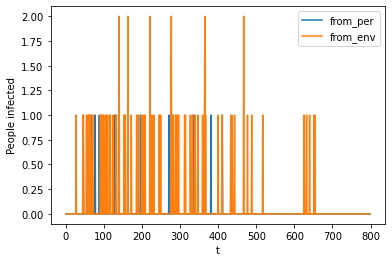

In [6]:
fig, ax = plt.subplots()
timeline.plot(ax = ax)
ax.set_ylabel('People infected')
ax.set_xlabel('t')

Using cumsum to get the `accumulated` number of infected people through different means over time.

Text(0.5, 0, 't')

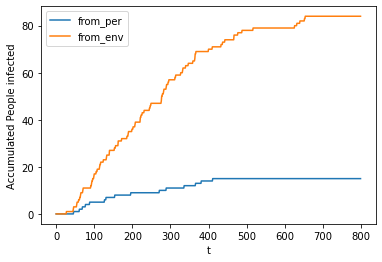

In [7]:
fig, ax = plt.subplots()
timeline.cumsum().plot(ax = ax)
ax.set_ylabel('Accumulated People infected')
ax.set_xlabel('t')

# Access to more data

## these files would be created, only if animatable_output is set to True

`agents_history` records the `health` status, and `x`, `y` coordinates of each agent over time. Each element `agents_history[t]` is a recarray of the status of all agents at time `t`.

`health = 0` indicates susceptible, `health = 1` indicates Exposed and `health = 2` indicated infectious.

recarray can be easily transformed into a pandas dataframe.

In [8]:
agents_history = np.load('Results/agents_history.npy')

`pollution_history` indicate the status of pollution over the location. 1 indicates polluted and 0 indicates clean.

In [9]:
pollution_history = np.load('Results/pollution_history.npy')     

`destination_history` indicates the current location of the destination for each agent. Only necessary for plots and tests

In [10]:
destination_history = np.load('Results/destination_history.npy')

### Status of all agents at time `t`

In [11]:
t = 10
pd.DataFrame( agents_history[t] )

,x,y,health
0,13.900590,21.115938,2
1,6.459201,18.488004,0
2,15.327896,11.400902,0
3,21.844497,16.431460,0
4,18.838725,10.935091,0
...,...,...,...
95,16.408669,9.926956,0
96,12.006159,9.903784,0
97,13.550280,26.717361,0
98,8.345496,8.476584,0


# Simple plot

`x` and `y` reflect location and color indicates health status.

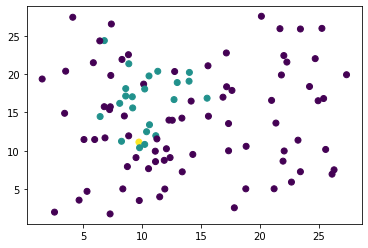

In [17]:
fig, ax = plt.subplots()
agents_status = pd.DataFrame( agents_history[100] )
ax.scatter( x = agents_status['x'], y = agents_status['y'], c = agents_status['health'] )

# Fancier illustration

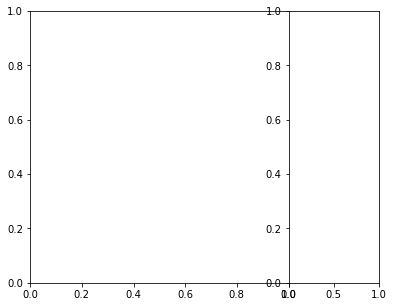

In [18]:
figure_ratio = 0.35;
fig = plt.figure(figsize=(5*(0.9+figure_ratio), 5 ) );
fig.subplots_adjust(wspace = 0);
gs = gridspec.GridSpec(1, 2, width_ratios=[1, figure_ratio]);
ax = plt.subplot(gs[0]);
ay = plt.subplot(gs[1]);

# fig = plt.figure()
# ax = fig.add_subplot(111)

alpha = 0.7


def animate(t, create_legend = True):
    ax.clear()
#     walk()
#     update_tile()
#     pollute()
    pollution = pollution_history[t]
    agents = agents_history[t]
    
#     if tile_infection_rate:
#         vmax = tile_infection_rate
#     else:
#         vmax = 1
    vmax = tile_infection_rate * 2
    ax.imshow(pollution.T, extent =[0,Lx, 0,Ly], vmin=0, vmax=vmax, origin = 'lower'\
             ,cmap = 'BuPu')
#     ax.imshow(pollution.T, extent =[0,30, 0,30], origin = 'lower')
#     plt.plot(agents['x'], agents['y'])
    #ax.plot(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], 'o', color = 'dodgerblue', alpha = alpha, markersize=4)
#     ax.plot(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], 'ro', alpha = alpha, markersize=4)
    agent_size = 30
    ax.scatter(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], s = agent_size\
               , marker='o', color='dodgerblue', alpha = alpha, edgecolors = 'k')
    ax.scatter(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], s = agent_size\
               , marker='o', color='tab:red', alpha = alpha, edgecolors = 'k')
    ax.scatter(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], s = agent_size\
               , marker='o', color='goldenrod', alpha = alpha, edgecolors = 'k')
    
    ax.scatter(destination_history[t][0], destination_history[t][1] \
               , s = 80, marker='d', color='darkolivegreen', alpha = alpha, edgecolors = 'k')
    #print(destination_history[t])
    #ax.plot(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], 'o', color = 'tab:green', alpha = alpha, markersize=4)
    
    #disease_timeline[t] = N - get_infetced()


    #ax.text(0 , 0.5 , "$t$ ="+ str(t) )
    if create_legend:
        #grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T
        ay.axis('off')
        legend_elements = [
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='S',
                              markerfacecolor='dodgerblue', markersize=10, alpha = alpha),
                              
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='I',
                              markerfacecolor='tab:red', markersize=10, alpha = alpha),
                              
                       Line2D([0], [0], marker='o', color='w', markeredgecolor='k', label='E',
                              markerfacecolor='goldenrod', markersize=10, alpha = alpha),

                              
                       Line2D([0], [0], marker='s', color='w', markeredgecolor=None, label='pollution',
                              markerfacecolor=cm.BuPu(0.5), markersize=10, alpha = alpha),
                       Line2D([0], [0], marker='d', color='w', markeredgecolor='k', label='target',
                              markerfacecolor='darkolivegreen', markersize=10, alpha = alpha),

#                        Line2D([0], [0], marker='o', color='w', markeredgecolor='black', label='Middle SES',
#                               markerfacecolor='white', markersize=10, alpha = alpha),
#                        Line2D([0], [0], marker='^', color='w', markeredgecolor='black', label='High SES',
#                               markerfacecolor='white', markersize=10, alpha = alpha),
#                        Line2D([0], [0], marker='o', color='w', linewidth = 2, markeredgecolor='green', label='Staying Home',
#                               markerfacecolor='white', markersize=14, alpha = alpha, linestyle='dashdot'),
#                               Line2D([0], [0], color='k', lw=1.2, label='Active Contact', alpha = alpha * 0.8),                              
#                               Line2D([0], [0], color='k', lw=1, label='Inactive Contact', linestyle='--', alpha = alpha * 0.5),
                              
                       #Patch(facecolor='white', linewidth = 2, edgecolor='r', linestyle ='solid',
                         #label='Color Patch'),
                       #matplotlib.patches.Circle((10, 10), edgecolor='r'),
                       #mpatches.Wedge(grid[0], 0.1, 30, 270, ec="none")


    ]
        ay.legend( handles=legend_elements, loc = 'center')


In [19]:
t = 50
L = 30
# np.sqrt( (agents_history[t]['x'] - L/2) ** 2 + (agents_history[t]['y'] - L/2) ** 2).mean()

# Save one Figure

In [20]:
circle1 = plt.Circle((L/2, L/2), 9.25, fill = 0, color='k', ls = '--')
# line1 = plt.Line2d((L/2, L/2), 8, fill = 0, color='k', ls = '--')


t = 42
animate(t)
text = '$\sigma=' + str( np.round(sigma_1,2) ) + '$'
ax.text(1, 28, text, fontsize=13)
# ax.add_patch(circle1)

fig
# ax.text(0, 0, '\sigma', fontdict=None)
fig.savefig('anim' + text + '.png', dpi = 300)

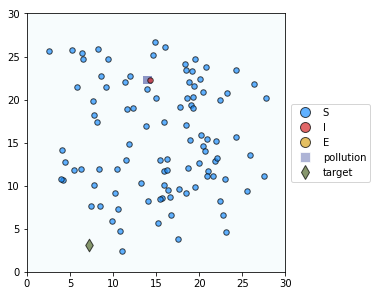

In [21]:
animate(0)
fig

# Animation

Create an animation of the progress of the simulation

In [ ]:
ani = animation.FuncAnimation(fig, animate, save_count = tMax)
#ani = animation.FuncAnimation(fig, animate)
dpi = 200
# file_name = str(time.gmtime()[0:5]) + '.GIF'
# ani.save( file_name ,dpi=dpi, writer = 'imagemagick')

writer = animation.writers['ffmpeg'](fps = 30)
file_name = str(time.gmtime()[0:6]) + '.mp4'
ani.save( file_name, dpi=dpi, writer = writer)

file_name